In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from warnings import filterwarnings
filterwarnings("ignore")

In [2]:
import os
print(os.getcwd())

C:\Users\ACER\Desktop


In [3]:
data=pd.read_csv('income_evaluation.csv')
df=data.copy()
df.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [4]:
df.isnull().sum()

age                0
 workclass         0
 fnlwgt            0
 education         0
 education-num     0
 marital-status    0
 occupation        0
 relationship      0
 race              0
 sex               0
 capital-gain      0
 capital-loss      0
 hours-per-week    0
 native-country    0
 income            0
dtype: int64

In [5]:
df.duplicated().sum()

24

In [6]:
df.drop_duplicates(inplace=True)

In [7]:
df.duplicated().sum()

0

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 32537 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   age              32537 non-null  int64 
 1    workclass       32537 non-null  object
 2    fnlwgt          32537 non-null  int64 
 3    education       32537 non-null  object
 4    education-num   32537 non-null  int64 
 5    marital-status  32537 non-null  object
 6    occupation      32537 non-null  object
 7    relationship    32537 non-null  object
 8    race            32537 non-null  object
 9    sex             32537 non-null  object
 10   capital-gain    32537 non-null  int64 
 11   capital-loss    32537 non-null  int64 
 12   hours-per-week  32537 non-null  int64 
 13   native-country  32537 non-null  object
 14   income          32537 non-null  object
dtypes: int64(6), object(9)
memory usage: 4.0+ MB


In [9]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
age,32537.0,38.585549,13.637984,17.0,28.0,37.0,48.0,90.0
fnlwgt,32537.0,189780.848511,105556.471009,12285.0,117827.0,178356.0,236993.0,1484705.0
education-num,32537.0,10.081815,2.571633,1.0,9.0,10.0,12.0,16.0
capital-gain,32537.0,1078.443741,7387.957424,0.0,0.0,0.0,0.0,99999.0
capital-loss,32537.0,87.368227,403.101833,0.0,0.0,0.0,0.0,4356.0
hours-per-week,32537.0,40.440329,12.346889,1.0,40.0,40.0,45.0,99.0


In [10]:
df.columns

Index(['age', ' workclass', ' fnlwgt', ' education', ' education-num',
       ' marital-status', ' occupation', ' relationship', ' race', ' sex',
       ' capital-gain', ' capital-loss', ' hours-per-week', ' native-country',
       ' income'],
      dtype='object')

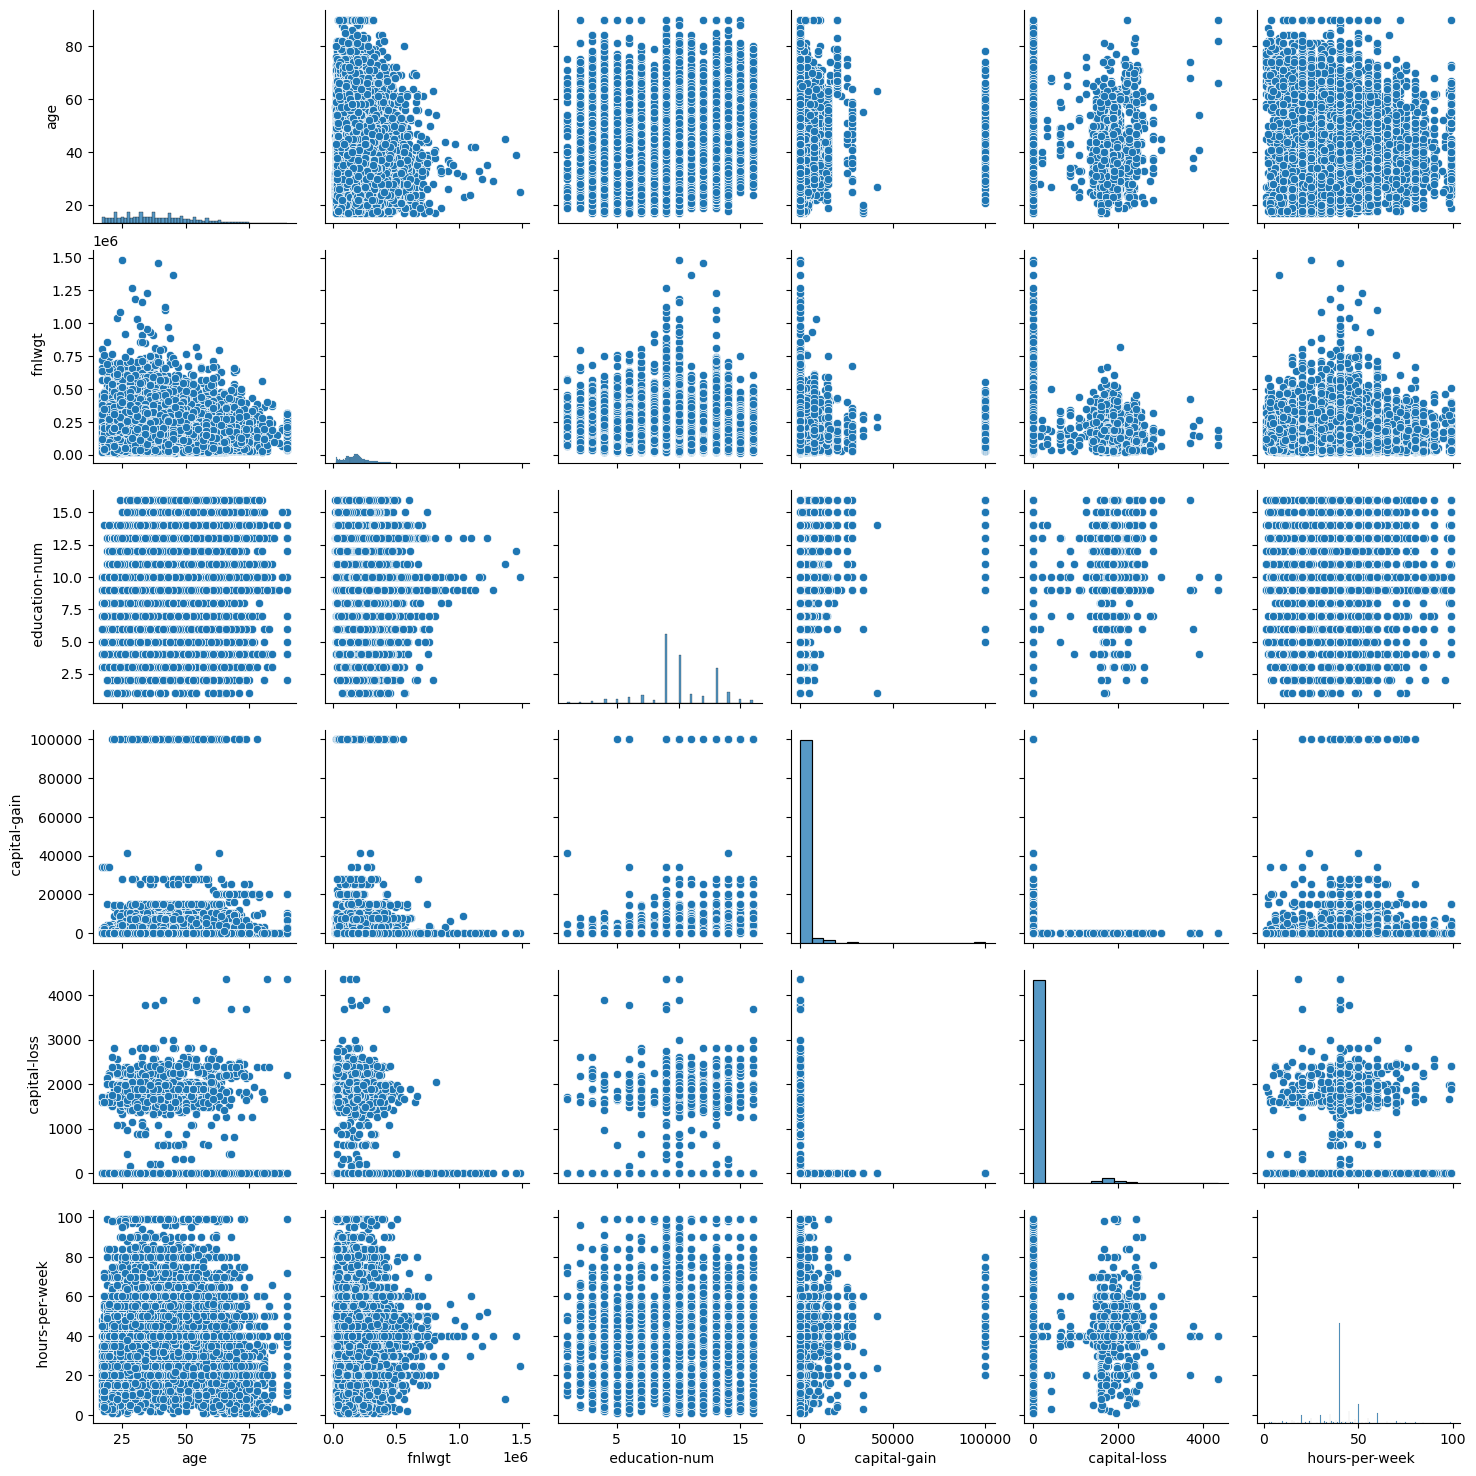

In [11]:
sns.pairplot(df)

<Axes: >

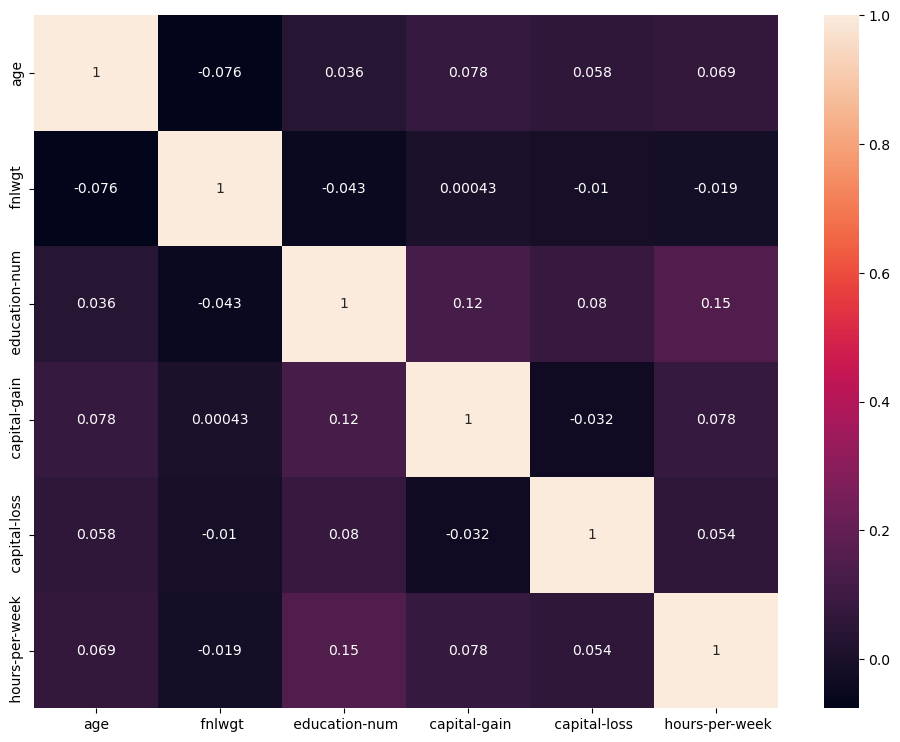

In [12]:
plt.figure(figsize=(12,9))
sns.heatmap(df.corr(),annot=True)

In [13]:
from sklearn.preprocessing import StandardScaler,OneHotEncoder
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score, roc_auc_score, f1_score, precision_recall_curve, classification_report, confusion_matrix
from sklearn.model_selection import train_test_split

from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer

In [14]:
from sklearn.preprocessing import LabelEncoder
label_encoder=LabelEncoder()
df['income_encoded']=label_encoder.fit_transform(df[' income'])

In [15]:
df.columns = df.columns.str.strip()
df[['workclass','education','marital-status','occupation','sex']]=df[['workclass','education','marital-status','occupation','sex']].astype(object)
dns_df=df[['workclass','education','marital-status','occupation','sex','income_encoded']]
dns_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 32537 entries, 0 to 32560
Data columns (total 6 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   workclass       32537 non-null  object
 1   education       32537 non-null  object
 2   marital-status  32537 non-null  object
 3   occupation      32537 non-null  object
 4   sex             32537 non-null  object
 5   income_encoded  32537 non-null  int32 
dtypes: int32(1), object(5)
memory usage: 1.6+ MB


In [21]:
df.columns

Index(['age', 'workclass', 'fnlwgt', 'education', 'education-num',
       'marital-status', 'occupation', 'relationship', 'race', 'sex',
       'capital-gain', 'capital-loss', 'hours-per-week', 'native-country',
       'income', 'income_encoded'],
      dtype='object')

In [22]:
X=df.drop(columns=["income_encoded"])
y=df["income_encoded"]

In [23]:
X_train,X_test,y_train,y_test=train_test_split(X,y,random_state=42,test_size=0.25)

In [24]:
numeric_features = ['age', 'education-num', 'capital-gain', 'capital-loss', 'hours-per-week']
categorical_features = ['workclass', 'education', 'marital-status', 'occupation', 'sex']

In [25]:
numeric_transformer=Pipeline(steps=[("scaler",StandardScaler())])
categorical_transformer=Pipeline(steps=[("onehor",OneHotEncoder(drop="first"))])

In [26]:
preprocessor=ColumnTransformer(
    transformers=[("num",numeric_transformer,numeric_features),
                  ("cat",categorical_transformer,categorical_features)])

In [27]:
pipeline=Pipeline(steps=[
    ("preprocessor",preprocessor),
    ("classifier",GradientBoostingClassifier(n_estimators=1000,
        validation_fraction=0.2,
        n_iter_no_change=5,
        tol=0.01,
        random_state=42
    ))
])

In [35]:
model=pipeline.fit(X_train,y_train)
y_pred=model.predict(X_test)

In [36]:
accuracy=accuracy_score(y_test,y_pred)
print(f"Accuracy: {accuracy}")

Accuracy: 0.8610940381069453


In [37]:
y_pred_probs = pipeline.predict_proba(X_test)[:, 1]
roc_auc = roc_auc_score(y_test, y_pred_probs)
precision, recall, thresholds = precision_recall_curve(y_test, y_pred_probs)

In [38]:
best_threshold = None
best_f1_score = 0

for threshold in thresholds:
    y_pred_thresholded = (y_pred_probs >= threshold).astype(int)
    f1 = f1_score(y_test, y_pred_thresholded)
    
    if roc_auc > 0.85 and f1 > best_f1_score:
        best_f1_score = f1
        best_threshold = threshold

print("Best Threshold:", best_threshold)
print("Best F1 Score:", best_f1_score)

final_predictions = (y_pred_probs >= best_threshold).astype(int)

classification_rep = classification_report(y_test, final_predictions)
conf_matrix = confusion_matrix(y_test, final_predictions)

Best Threshold: 0.3388079391571694
Best F1 Score: 0.7070949185043144


In [39]:
print("Classification Report:")
print(classification_rep)
print("Confusion Matrix:")
print(conf_matrix)

Classification Report:
              precision    recall  f1-score   support

           0       0.92      0.88      0.90      6159
           1       0.67      0.75      0.71      1976

    accuracy                           0.85      8135
   macro avg       0.79      0.81      0.80      8135
weighted avg       0.86      0.85      0.85      8135

Confusion Matrix:
[[5438  721]
 [ 501 1475]]


In [40]:
import pickle

In [41]:
document="mymodel"
pickle.dump(model,open(document,"wb"))

In [42]:
loaded_model=pickle.load(open(document,"rb"))
y_loded_model_pred=loaded_model.predict(X_test)

In [43]:
from sklearn.metrics import accuracy_score,confusion_matrix
print("Confusion Matrix \n\n",confusion_matrix(y_test,y_loded_model_pred),"\n")
print("Accuary Score" , '= %0.2f' % accuracy_score(y_test,y_loded_model_pred),"%")

Confusion Matrix 

 [[5895  264]
 [ 866 1110]] 

Accuary Score = 0.86 %
